<a href="https://colab.research.google.com/github/Sahil-Singh2002/Solving-PDE-s-using-Deep-Learning-Algorithms/blob/main/massmatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def domain_1(x: np.ndarray) -> bool:
    """
    Check if a point lies within a triangle defined by constraints:
    - x[0] >= 0
    - x[1] >= 0
    - x[0] + x[1] <= 1

    Args:
        x (np.ndarray): A 2D point as a NumPy array.

    Returns:
        bool: True if the point lies within the triangle, False otherwise.
    """
    return (x[0] >= 0) & (x[1] >= 0) & (x[0] + x[1] <= 1)

def domain_2(x: np.ndarray, w_i: np.ndarray, b_i: float) -> bool:
    """
    Check if a point lies within the intersection of a triangle (domain_1)
    and a half-space defined by a hyperplane:
        w_i.T @ x - b_i >= 0

    Args:
        x (np.ndarray): A 2D point as a NumPy array.
        w_i (np.ndarray): A 2D weight vector defining the hyperplane.
        b_i (float): A bias term for the hyperplane.

    Returns:
        bool: True if the point satisfies both constraints, False otherwise.
    """
    return domain_1(x) & (np.dot(w_i, x) + b_i >= 0 )

def domain_3(x: np.ndarray, w_j: np.ndarray, w_i: np.ndarray, b_i: float, b_j: float) -> bool:
    """
    Check if a point lies within the intersection of domain_2
    and another half-space defined by a second hyperplane:
        w_j.T @ x - b_j >= 0

    Args:
        x (np.ndarray): A 2D point as a NumPy array.
        w_j (np.ndarray): A 2D weight vector for the second hyperplane.
        w_i (np.ndarray): A 2D weight vector for the first hyperplane.
        b_i (float): A bias term for the first hyperplane.
        b_j (float): A bias term for the second hyperplane.

    Returns:
        bool: True if the point satisfies all constraints, False otherwise.
    """
    return domain_2(x, w_i, b_i) & ((w_j.T @ x) + b_j >= 0  )

def euclidean_distance(coord1: np.ndarray, coord2: np.ndarray) -> float:
    """
    Calculate the Euclidean distance between two 2D coordinates.

    Args:
        coord1 (np.ndarray): The first coordinate as a NumPy array.
        coord2 (np.ndarray): The second coordinate as a NumPy array.

    Returns:
        float: The Euclidean distance between coord1 and coord2.
    """
    return np.linalg.norm(coord1 - coord2)

def reorder_nodes(reference_node: np.ndarray, nodes_to_sort: list[dict]) -> list[dict]:
    """
    Reorders a list of nodes based on proximity to a reference node.
    The closest node is chosen first, and each subsequent node is the closest
    to the previous one.

    Args:
        reference_node (np.ndarray): A 2D coordinate representing the reference node.
        nodes_to_sort (list[dict]): A list of nodes, where each node is a dictionary
                                    containing a "coordinates" key with a 2D NumPy array.

    Returns:
        list[dict]: A reordered list of nodes sorted by proximity.
    """
    ordered_nodes = []
    remaining_nodes = nodes_to_sort.copy()
    current_reference = reference_node

    while remaining_nodes:
        # Find the closest node to the current reference
        closest_node = min(
            remaining_nodes,
            key=lambda node: euclidean_distance(current_reference, node["coordinates"])
        )
        # Add the closest node to the ordered list
        ordered_nodes.append(closest_node)
        # Remove the exact node by identity, not by value
        remaining_nodes = [node for node in remaining_nodes if node is not closest_node]
        # Update the current reference to the closest node
        current_reference = closest_node["coordinates"]

    return ordered_nodes

def remove_duplicate_coordinates(nodes):
    """
    Removes nodes with identical coordinates from a list of nodes.

    Args:
        nodes (list[dict]): A list of nodes, where each node is a dictionary
                                containing a "coordinates" key with a 2D NumPy array.

    Returns:
        list[dict]: A new list of nodes with duplicate coordinates removed.
    """

    unique_nodes = []
    seen_coordinates = set()

    for node in nodes:
        coordinates_tuple = tuple(node["coordinates"])  # Convert to tuple for hashability
        if coordinates_tuple not in seen_coordinates:
            seen_coordinates.add(coordinates_tuple)
            unique_nodes.append(node)

    return unique_nodes

"""
def composite_trapezium(domain,n,f):


    x = np.linspace(domain[0],domain[1],n+1) #Construct the quadrature points
    h = (domain[1]-domain[0])/n

    #Construct the quadrature weights:
    #These are the coefficient w_i of f(x_i) in the summation
    weights = h*np.ones(n+1)
    weights[[0,-1]] = h/2

    integral_approx = np.sum(f(x)*weights)

    return integral_approx

def romberg_integration(domain,n,f,level):
    '''
    To approximate the definite integral of the function f(x) over the interval [a,b]
    using the Richardson extrapolation to CTR(n) with the specified level of extrapolation (level).

    Returns
    -------
    integral_approx (float): This gives the approximated integral of the
    function f(x) in the interval [a,b] for Romberg integration approximation based on
    CTR(level*n). Giving R_(level,level).
    '''
    R = np.zeros((level+1,level+1))
    for i in range(0,level+1):
        R[i,0]=composite_trapezium(domain,n,f)
        n = 2*n
        for j in range(1,i+1):
            R[i,j] = (R[i,j-1]*4**(j) -R[i-1,j-1])/(4**(j) -1)

    integral_approx = R[level-1,level-1]
    return integral_approx
"""

# Step 1: Solve the linear systems for each node
# x is defined as (x,y) for desmose demonstration

boundary_1,b1 = np.array([1,0]), 0 # where x = 0
boundary_2,b2 = np.array([0,1]), 0 # where y = 0
boundary_3,b3 = np.array([1,1]), 1 # where x + y = 1


In [ ]:
def step_1(boundary_1, boundary_2, boundary_3, b1, b2, b3):
  A1_1 = np.array([boundary_1, boundary_2])
  b1_1 = np.array([b1, b2])
  x1 = np.linalg.solve(A1_1, b1_1)

  A2_1 = np.array([boundary_3, boundary_1])
  b2_1 = np.array([b3, b1])
  x2 = np.linalg.solve(A2_1, b2_1)

  A3_1 = np.array([boundary_2, boundary_3])
  b3_1 = np.array([b2, b3])
  x3 = np.linalg.solve(A3_1, b3_1)

  # Store the results in a list of dictionaries, including A and b
  nodes_1 = [
    {"node": 1, "coordinates": x1, "A": A1_1, "b": b1_1},
    {"node": 2, "coordinates": x2, "A": A2_1, "b": b2_1},
    {"node": 3, "coordinates": x3, "A": A3_1, "b": b3_1},
      ]

  """print("____________________Step 1 Nodes order and viable____________________")
  # Print the list of nodes
  for node in nodes_1:
    print(f"Node {node['node']} coordinates: {node['coordinates']}")"""

  return nodes_1

# Step 2: Define hyperplane and filter nodes, needs be dynamically changing

def step_2(boundary_1, boundary_2, boundary_3, b1, b2, b3, w_i, b_i):

  nodes_1 = step_1(boundary_1, boundary_2, boundary_3, b1, b2, b3)
  nodes_1_filtered = [node for node in nodes_1 if domain_2(node["coordinates"], w_i, b_i)]

  print("____________________Nodes 1 filtered to new domain____________________")
  for node in nodes_1_filtered:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")


  bais_i = b_i
  weight_i = w_i

  # Solve the linear systems for the new nodes
  A4_2 = np.array([weight_i, boundary_3])
  b4_2 = np.array([bais_i, b3])
  x4 = np.linalg.solve(A4_2, b4_2)


  A5_2 = np.array([weight_i, boundary_1])
  b5_2 = np.array([bais_i, b1])
  x5 = np.linalg.solve(A5_2, b5_2)

  A6_2 = np.array([boundary_2, weight_i])
  b6_2 = np.array([b2, bais_i])
  x6 = np.linalg.solve(A6_2, b6_2)

  print("______________________________Check 1______________________________________")

  # Store the results in a list of dictionaries, including A and b
  nodes_2_dummy = [
    {"node": 4, "coordinates": x4, "A": A4_2, "b": b4_2},
    {"node": 5, "coordinates": x5, "A": A5_2, "b": b5_2},
    {"node": 6, "coordinates": x6, "A": A6_2, "b": b6_2},
    ]

  print("____________________Step 2 Nodes____________________")
  for node in nodes_2_dummy:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")

  # Filter the new nodes based on domain_2
  nodes_2 = [node for node in nodes_2_dummy if domain_2(node["coordinates"], w_i, b_i)]

  print("_____All nodes_2_filtered _______")
  for node in nodes_2:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")

  # Reorder nodes_2 based on proximity to the last node in nodes_1_filtered
  if nodes_1_filtered:
    last_node_coordinates = nodes_1_filtered[-1]["coordinates"]
    reordered_nodes_2 = reorder_nodes(last_node_coordinates, nodes_2)

    print("____________________Reordered Nodes 2____________________")
    for node in reordered_nodes_2:
      print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")
  else:
    print("No nodes in nodes_1_filtered to use as a reference for reordering nodes_2.")

  # Merge nodes_1_filtered and reordered_nodes_2
  nodes_2_filtered = nodes_1_filtered + reordered_nodes_2
  #nodes_2_filtered = [node for node in nodes_2 if domain_2(node["coordinates"], w_i, b_i)]

  unique_nodes = remove_duplicate_coordinates(nodes_2_filtered)

  print("____________________Merged Nodes:____________________")
  for node in unique_nodes:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")



  return unique_nodes


def diagonalMatrix(boundary_1, boundary_2, boundary_3, b1, b2, b3, wi, bi) -> float:
  nodes_2_filtered = step_2(boundary_1, boundary_2, boundary_3, b1, b2, b3, wi, bi)
  # Initialize lists to store a and b
  a_list = []
  b_list = []
  n = len(nodes_2_filtered)  # Number of nodes
  F = np.zeros((n, 1))  # Initialize an n x n matrix filled with zeros
  # Now, compare subsequent nodes, including comparing the last node with the first node
  for i in range(0, n):
    # The next node index, wrap around to the first node when at the last node
    next_node_index = (i + 1) % n

    for j in range(len(nodes_2_filtered[i]["A"])):
      for k in range(len(nodes_2_filtered[next_node_index]["A"])):
        if np.array_equal(nodes_2_filtered[i]["A"][j], nodes_2_filtered[next_node_index]["A"][k]):
          # If a match is found for the row of A
          a_list.append(nodes_2_filtered[i]["A"][j])
          b_list.append(nodes_2_filtered[i]["b"][j])

  # Now that we have appended matching values for a and b, print the final a_list and b_list
  print("a_list:", a_list)
  print("b_list:", b_list)


  # Loop through each pair of nodes and calculate the distance
  for i in range(n):
    coord_i = nodes_2_filtered[i]["coordinates"]
    coord_j = nodes_2_filtered[(i + 1) % n]["coordinates"]
    distance = euclidean_distance(coord_i, coord_j)

    F[i] = distance

  # Print the resulting distance matrix F
  print("Distance Facet |F_{i}|:")
  print(F)

  # Now, calculate the summation formula
  summation_result = 0
  for i in range(n):

    beta_i = b_list[i]  # b_i for node i
    a_i = a_list[i]  # a_i for node i

    # Compute the norm of a_i
    norm_a_i = np.linalg.norm(a_i)
    # Sum of distances d_ij for all j
    norm_Fi = np.abs(F[i])
    # Add the term to the summation result
    summation_result += (beta_i / norm_a_i) * norm_Fi

  # Final result: divide by n to get the average
  final_result = (1 / 2) * summation_result

  return final_result


# x = (x,y)
#Example of the weight and bais from Neural Network
w_i, b_i = np.array([1, 2]), -0.5
#w_j, b_j = np.array([-2, 1]), -1
#w_k, b_k = np.array([-2, 1]), 1
#w_h, b_h = np.array([2, 1]), 1
W = np.array([w_i]) #,w_j,w_k,w_h])
b = np.array([b_i]) #,b_j,b_k,b_h])

def MassMatrix(W,b,boundary_1,boundary_2,boundary_3,b1,b2,b3): ## also add w_j,b_j
  NoNeuron = np.shape(W)[0] # forexample 2
  MatrixM = np.zeros((NoNeuron,NoNeuron))

  for i in range(NoNeuron):
    MatrixM[i][i] = diagonalMatrix(boundary_1, boundary_2, boundary_3, b1, b2, b3, W[i], b[i]).item() #diagonal entries
    for j in range(i):
      MatrixM[i][j] = 0 # Place holder Exact intgegation up to step 3
      MatrixM[j][i] = MatrixM[i][j] # The mass matrix is symmetric
  return MatrixM

MatrixM = MassMatrix(W,b,boundary_1,boundary_2,boundary_3,b1,b2,b3)

print("_______________________________________________________________________")


print(f"The Mass matrix: \n {MatrixM}")

____________________Nodes 1 filtered to new domain____________________
Node 2 coordinates: [0. 1.], A: [[1 1]
 [1 0]], b: [1 0]
Node 3 coordinates: [1. 0.], A: [[0 1]
 [1 1]], b: [0 1]
______________________________Check 1______________________________________
____________________Step 2 Nodes____________________
Node 4 coordinates: [ 2.5 -1.5], A: [[1 2]
 [1 1]], b: [-0.5  1. ]
Node 5 coordinates: [ 0.   -0.25], A: [[1 2]
 [1 0]], b: [-0.5  0. ]
Node 6 coordinates: [-0.5  0. ], A: [[0 1]
 [1 2]], b: [ 0.  -0.5]
_____All nodes_2_filtered _______
____________________Reordered Nodes 2____________________
____________________Merged Nodes:____________________
Node 2 coordinates: [0. 1.], A: [[1 1]
 [1 0]], b: [1 0]
Node 3 coordinates: [1. 0.], A: [[0 1]
 [1 1]], b: [0 1]
a_list: [array([1, 1]), array([1, 1])]
b_list: [1, 1]
Distance Facet |F_{i}|:
[[1.41421356]
 [1.41421356]]
_______________________________________________________________________
The Mass matrix: 
 [[1.]]


In [ ]:
import numpy as np

def domain_1(x: np.ndarray) -> bool:
    """
    Check if a point x = (x[0], x[1]) lies within the triangle:
      x >= 0
      y >= 0
      x + y <= 1
    """
    return (x[0] >= 0) and (x[1] >= 0) and ((x[0] + x[1]) <= 1)

def domain_2(x: np.ndarray, w_i: np.ndarray, b_i: float) -> bool:
    """
    Check if x is in domain_1 AND satisfies w_i^T x + b_i >= 0.
    """
    return domain_1(x) and (np.dot(w_i, x) + b_i >= 0)

def euclidean_distance(coord1: np.ndarray, coord2: np.ndarray) -> float:
    """Compute Euclidean distance between two points."""
    return np.linalg.norm(coord1 - coord2)

def reorder_nodes(reference_node: np.ndarray, nodes_to_sort: list[dict]) -> list[dict]:
    """
    Reorders nodes based on proximity to a reference point.
    The closest node is chosen next, and so on.
    """
    ordered_nodes = []
    remaining_nodes = nodes_to_sort.copy()
    current_reference = reference_node

    while remaining_nodes:
        closest_node = min(
            remaining_nodes,
            key=lambda node: euclidean_distance(current_reference, node["coordinates"])
        )
        ordered_nodes.append(closest_node)
        remaining_nodes.remove(closest_node)
        current_reference = closest_node["coordinates"]

    return ordered_nodes

def remove_duplicate_coordinates(nodes):
    """Removes nodes with identical coordinates (within a tolerance)."""
    unique_nodes = []
    seen_coordinates = set()

    for node in nodes:
        coords_rounded = tuple(np.round(node["coordinates"], 8))
        if coords_rounded not in seen_coordinates:
            seen_coordinates.add(coords_rounded)
            unique_nodes.append(node)

    return unique_nodes

# Boundaries for the triangle x >= 0, y >= 0, x + y <= 1
# "boundary_1" => x=0
# "boundary_2" => y=0
# "boundary_3" => x+y=1
boundary_1, b1 = np.array([1, 0]), 0
boundary_2, b2 = np.array([0, 1]), 0
boundary_3, b3 = np.array([1, 1]), 1

def step_1(boundary_1, boundary_2, boundary_3, b1, b2, b3):
    """
    Solve the linear systems for each pair of boundaries to get the triangle's vertices:
      1) x=0 & y=0 -> (0,0)
      2) x=0 & x+y=1 -> (0,1)
      3) y=0 & x+y=1 -> (1,0)
    """
    A1_1 = np.array([boundary_1, boundary_2])  # x=0, y=0
    b1_1 = np.array([b1, b2])
    x1 = np.linalg.solve(A1_1, b1_1)

    A2_1 = np.array([boundary_3, boundary_1])  # x+y=1, x=0
    b2_1 = np.array([b3, b1])
    x2 = np.linalg.solve(A2_1, b2_1)

    A3_1 = np.array([boundary_2, boundary_3])  # y=0, x+y=1
    b3_1 = np.array([b2, b3])
    x3 = np.linalg.solve(A3_1, b3_1)

    nodes_1 = [
        {"node": 1, "coordinates": x1, "A": A1_1, "b": b1_1},
        {"node": 2, "coordinates": x2, "A": A2_1, "b": b2_1},
        {"node": 3, "coordinates": x3, "A": A3_1, "b": b3_1},
    ]

    # Debug: Print the nodes found in step_1
    print("===== Step 1: Triangle Vertices (Unfiltered) =====")
    for node in nodes_1:
        print(f"Node {node['node']} => coords={node['coordinates']}")
    print()

    return nodes_1

def step_2(boundary_1, boundary_2, boundary_3, b1, b2, b3, w_i, b_i):
    """
    1) Take the original triangle nodes (step_1).
    2) Keep only those that satisfy domain_2 (w_i^T x + b_i >= 0).
    3) Solve intersections of w_i^T x = -b_i with each boundary.
    4) Filter those intersection points (4,5,6) via domain_2.
    5) Merge & remove duplicates.
    """
    nodes_1 = step_1(boundary_1, boundary_2, boundary_3, b1, b2, b3)

    print("===== Step 2: Checking step_1 nodes against domain_2 =====")
    nodes_1_filtered = []
    for node in nodes_1:
        c = node["coordinates"]
        in_dom_2 = domain_2(c, w_i, b_i)
        print(f"Node {node['node']} => coords={c}, domain_2={in_dom_2}")
        if in_dom_2:
            nodes_1_filtered.append(node)
    print()

    # Intersection with each boundary:
    # We have w_i^T x = -b_i, plus boundary condition
    # This is the critical fix: use -b_i on the RHS
    A4_2 = np.array([w_i, boundary_3])
    b4_2 = np.array([-b_i, b3])
    x4 = np.linalg.solve(A4_2, b4_2)

    A5_2 = np.array([w_i, boundary_1])
    b5_2 = np.array([-b_i, b1])
    x5 = np.linalg.solve(A5_2, b5_2)

    A6_2 = np.array([w_i, boundary_2])
    b6_2 = np.array([-b_i, b2])
    x6 = np.linalg.solve(A6_2, b6_2)

    nodes_2_dummy = [
        {"node": 4, "coordinates": x4, "A": A4_2, "b": b4_2},
        {"node": 5, "coordinates": x5, "A": A5_2, "b": b5_2},
        {"node": 6, "coordinates": x6, "A": A6_2, "b": b6_2},
    ]

    print("===== Step 2: Intersection Nodes (before filter) =====")
    for node in nodes_2_dummy:
        c = node["coordinates"]
        print(f"Node {node['node']} => coords={c}, domain_2={domain_2(c, w_i, b_i)}")
    print()

    # Filter these intersection points by domain_2
    nodes_2 = [n for n in nodes_2_dummy if domain_2(n["coordinates"], w_i, b_i)]

    print("===== Step 2: Intersection Nodes (filtered by domain_2) =====")
    for node in nodes_2:
        print(f"Node {node['node']} => coords={node['coordinates']}")
    print()

    # Reorder them if we have a reference
    if nodes_1_filtered:
        last_coords = nodes_1_filtered[-1]["coordinates"]
        reordered_nodes_2 = reorder_nodes(last_coords, nodes_2)
    else:
        reordered_nodes_2 = nodes_2

    print("===== Step 2: Intersection Nodes (after reorder) =====")
    for node in reordered_nodes_2:
        print(f"Node {node['node']} => coords={node['coordinates']}")
    print()

    # Merge step_1 filtered with the new intersection nodes
    merged_nodes = nodes_1_filtered + reordered_nodes_2

    # Remove duplicates
    unique_nodes = remove_duplicate_coordinates(merged_nodes)

    print("===== Step 2: Final Unique Nodes (merged) =====")
    for node in unique_nodes:
        print(f"Node {node['node']} => coords={node['coordinates']}")
    print()

    return unique_nodes

def diagonalMatrix(boundary_1, boundary_2, boundary_3, b1, b2, b3, wi, bi) -> float:
    """
    Collect all valid nodes in domain_2 (the intersection of the triangle and w_i^T x + b_i >= 0).
    Then approximate the 'area' (or measure) of that polygon using the boundary constraints.
    """
    print("========= diagonalMatrix: START =========")
    nodes_2_filtered = step_2(boundary_1, boundary_2, boundary_3, b1, b2, b3, wi, bi)

    print("===== diagonalMatrix: Nodes used for polygon area =====")
    for node in nodes_2_filtered:
        c = node["coordinates"]
        print(f"Node {node['node']} => coords={c}")
    print()

    if len(nodes_2_filtered) < 3:
        print("Not enough nodes to form a polygon. Area = 0.0")
        return 0.0

    # Build the perimeter distances
    n = len(nodes_2_filtered)
    F = np.zeros((n, 1))
    for i in range(n):
        j = (i + 1) % n
        p_i = nodes_2_filtered[i]["coordinates"]
        p_j = nodes_2_filtered[j]["coordinates"]
        dist_ij = euclidean_distance(p_i, p_j)
        F[i, 0] = dist_ij

    print("Edges (perimeter distances) F:")
    print(F)
    print()

    # Identify which constraints define each edge
    a_list = []
    b_list = []
    for i in range(n):
        j = (i + 1) % n
        A_i, b_i_ = nodes_2_filtered[i]["A"], nodes_2_filtered[i]["b"]
        A_j, b_j_ = nodes_2_filtered[j]["A"], nodes_2_filtered[j]["b"]

        # Match constraints from node i to node j
        for idx_i, row_i in enumerate(A_i):
            for idx_j, row_j in enumerate(A_j):
                if np.allclose(row_i, row_j, atol=1e-8) and np.isclose(b_i_[idx_i], b_j_[idx_j], atol=1e-8):
                    a_list.append(row_i)
                    b_list.append(b_i_[idx_i])

    print("Matched constraints (a_list and b_list):")
    for ai, bi_ in zip(a_list, b_list):
        print(f"  a = {ai},  b = {bi_}")
    print()

    # Summation formula: (1/2) * sum( (b_i / ||a_i|| ) * edge_length )
    summation_result = 0.0
    m = min(len(a_list), n)  # just in case
    for i in range(m):
        beta_i = b_list[i]
        a_i = a_list[i]
        norm_a = np.linalg.norm(a_i)
        norm_Fi = F[i, 0]
        partial = (beta_i / norm_a) * norm_Fi
        print(f"Edge {i}: (beta_i / ||a_i||) * F[i] = ({beta_i}/{norm_a}) * {norm_Fi} = {partial}")
        summation_result += partial

    final_area_est = 0.5 * summation_result
    print(f"** Summation result = {summation_result},  final area = {final_area_est}")
    print("========= diagonalMatrix: END =========\n")

    return final_area_est

# Example hyperplane w_i^T x + b_i >= 0
w_i, b_i = np.array([1, 2]), -0.5  # => x + 2y >= 0.5
W = np.array([w_i])
B = np.array([b_i])

def MassMatrix(W, B, boundary_1, boundary_2, boundary_3, b1, b2, b3):
    """
    Construct the (NoNeuron x NoNeuron) mass matrix.
    Diagonal entries come from diagonalMatrix; off-diagonal entries = 0 for now.
    """
    NoNeuron = len(W)
    MatrixM = np.zeros((NoNeuron, NoNeuron))

    for i in range(NoNeuron):
        print(f"======= MassMatrix: Computing diagonal entry {i} =======")
        MatrixM[i][i] = diagonalMatrix(boundary_1, boundary_2, boundary_3, b1, b2, b3, W[i], B[i])
        # Off-diagonal placeholder
        for j in range(i):
            MatrixM[i][j] = 0.0
            MatrixM[j][i] = 0.0

    return MatrixM

if __name__ == "__main__":
    print("============ MAIN ============")
    MatrixM = MassMatrix(W, B, boundary_1, boundary_2, boundary_3, b1, b2, b3)
    print("_________________________________________________________")
    print(f"The Mass matrix:\n{MatrixM}")


============ MAIN ============
======= MassMatrix: Computing diagonal entry 0 =======
========= diagonalMatrix: START =========
===== Step 1: Triangle Vertices (Unfiltered) =====
Node 1 => coords=[0. 0.]
Node 2 => coords=[0. 1.]
Node 3 => coords=[1. 0.]

===== Step 2: Checking step_1 nodes against domain_2 =====
Node 1 => coords=[0. 0.], domain_2=False
Node 2 => coords=[0. 1.], domain_2=True
Node 3 => coords=[1. 0.], domain_2=True

===== Step 2: Intersection Nodes (before filter) =====
Node 4 => coords=[ 1.5 -0.5], domain_2=False
Node 5 => coords=[0.   0.25], domain_2=True
Node 6 => coords=[0.5 0. ], domain_2=True

===== Step 2: Intersection Nodes (filtered by domain_2) =====
Node 5 => coords=[0.   0.25]
Node 6 => coords=[0.5 0. ]

===== Step 2: Intersection Nodes (after reorder) =====
Node 6 => coords=[0.5 0. ]
Node 5 => coords=[0.   0.25]

===== Step 2: Final Unique Nodes (merged) =====
Node 2 => coords=[0. 1.]
Node 3 => coords=[1. 0.]
Node 6 => coords=[0.5 0. ]
Node 5 => coords=[0. 

In [ ]:
import numpy as np

################################################################################
# 1. Domain Checks:  Now everything is in the form  a^T x >= b.
################################################################################

def domain_1(x: np.ndarray) -> bool:
    """
    Check if a point x is in the triangle defined by:
       1) [1,0]^T x >= 0       (i.e. x >= 0)
       2) [0,1]^T x >= 0       (i.e. y >= 0)
       3) [-1,-1]^T x >= -1    (i.e. x + y <= 1)
    """
    # boundary_1 = a=[1,0], b=0
    # boundary_2 = a=[0,1], b=0
    # boundary_3 = a=[-1,-1], b=-1
    checks = []
    checks.append(np.dot(np.array([1,0]), x) >= 0.0)    # x >= 0
    checks.append(np.dot(np.array([0,1]), x) >= 0.0)    # y >= 0
    checks.append(np.dot(np.array([-1,-1]), x) >= -1.0) # x+y <= 1 => -(x+y)>=-1
    return all(checks)

def domain_2(x: np.ndarray, w_i: np.ndarray, b_i: float) -> bool:
    """
    Check if x is in domain_1 AND also satisfies  w_i^T x >= b_i.
    (Here, w_i^T x >= b_i is also in 'Option A' form.)
    """
    return domain_1(x) and (np.dot(w_i, x) >= b_i)

################################################################################
# 2. Utility functions: distance, reorder, duplicates, etc.
################################################################################

def euclidean_distance(coord1: np.ndarray, coord2: np.ndarray) -> float:
    """Compute Euclidean distance between two points."""
    return np.linalg.norm(coord1 - coord2)

def reorder_nodes(reference_node: np.ndarray, nodes_to_sort: list[dict]) -> list[dict]:
    """
    Reorders nodes based on proximity to a reference point.
    The closest node is chosen next, and so on.
    """
    ordered_nodes = []
    remaining_nodes = nodes_to_sort.copy()
    current_reference = reference_node

    while remaining_nodes:
        closest_node = min(
            remaining_nodes,
            key=lambda node: euclidean_distance(current_reference, node["coordinates"])
        )
        ordered_nodes.append(closest_node)
        remaining_nodes.remove(closest_node)
        current_reference = closest_node["coordinates"]

    return ordered_nodes

def remove_duplicate_coordinates(nodes):
    """Removes nodes with identical coordinates (within a tolerance)."""
    unique_nodes = []
    seen_coords = set()

    for node in nodes:
        coords_rounded = tuple(np.round(node["coordinates"], 8))
        if coords_rounded not in seen_coords:
            seen_coords.add(coords_rounded)
            unique_nodes.append(node)
    return unique_nodes

################################################################################
# 3. Step 1: Solve boundary pair intersections.
#    Now each boundary is  a^T x = b  in ">= b" sense.
################################################################################

def step_1(boundary_1, boundary_2, boundary_3, b1, b2, b3):
    """
    Solve the linear systems for the three pairs of boundaries:
      1) boundary_1 & boundary_2
      2) boundary_1 & boundary_3
      3) boundary_2 & boundary_3

    This yields the triangle's vertices in 'Option A' style.
    """
    # Solve  a^T x = b  with two lines
    A12 = np.array([boundary_1, boundary_2])  # e.g. x=0 & y=0 in the old sense
    b12 = np.array([b1, b2], dtype=float)
    x12 = np.linalg.solve(A12, b12)

    A13 = np.array([boundary_1, boundary_3])
    b13 = np.array([b1, b3], dtype=float)
    x13 = np.linalg.solve(A13, b13)

    A23 = np.array([boundary_2, boundary_3])
    b23 = np.array([b2, b3], dtype=float)
    x23 = np.linalg.solve(A23, b23)

    nodes_1 = [
        {"node": 1, "coordinates": x12, "A": A12, "b": b12},
        {"node": 2, "coordinates": x13, "A": A13, "b": b13},
        {"node": 3, "coordinates": x23, "A": A23, "b": b23},
    ]

    # Debug
    print("===== step_1: original 3 boundary intersections =====")
    for node in nodes_1:
        print(f"Node {node['node']} => coords={node['coordinates']}")
    print()
    return nodes_1

################################################################################
# 4. Step 2: Filter those nodes by domain_2 and add intersections with hyperplane
################################################################################

def step_2(boundary_1, boundary_2, boundary_3, b1, b2, b3, w_i, b_i):
    """
    1) Collect triangle nodes from step_1.
    2) Keep only those in domain_2 ( i.e. a^T x >= b for the triangle,
       plus w_i^T x >= b_i ).
    3) Find intersection of hyperplane w_i^T x = b_i with each boundary line,
       then also filter them by domain_2.
    4) Merge, reorder, remove duplicates => final polygon node list.
    """
    # Step 1
    nodes_1 = step_1(boundary_1, boundary_2, boundary_3, b1, b2, b3)

    # Filter by domain_2
    print("===== step_2: filtering step_1 nodes with domain_2 =====")
    nodes_1_filtered = []
    for node in nodes_1:
        x_coord = node["coordinates"]
        in_dom = domain_2(x_coord, w_i, b_i)
        print(f"Node {node['node']} coords={x_coord}, domain_2={in_dom}")
        if in_dom:
            nodes_1_filtered.append(node)
    print()

    # Now find new intersections: w_i^T x = b_i with each boundary
    # Solve [w_i, boundary_k] x = [b_i, b_k]
    A4 = np.array([w_i, boundary_3])
    b4 = np.array([b_i, b3], dtype=float)
    x4 = np.linalg.solve(A4, b4)

    A5 = np.array([w_i, boundary_1])
    b5 = np.array([b_i, b1], dtype=float)
    x5 = np.linalg.solve(A5, b5)

    A6 = np.array([w_i, boundary_2])
    b6 = np.array([b_i, b2], dtype=float)
    x6 = np.linalg.solve(A6, b6)

    nodes_2_dummy = [
        {"node": 4, "coordinates": x4, "A": A4, "b": b4},
        {"node": 5, "coordinates": x5, "A": A5, "b": b5},
        {"node": 6, "coordinates": x6, "A": A6, "b": b6},
    ]

    print("===== step_2: intersection with hyperplane (before filtering) =====")
    for node in nodes_2_dummy:
        x_coord = node["coordinates"]
        in_dom = domain_2(x_coord, w_i, b_i)
        print(f"Node {node['node']} coords={x_coord}, domain_2={in_dom}")
    print()

    # Filter these intersections by domain_2
    nodes_2 = [n for n in nodes_2_dummy if domain_2(n["coordinates"], w_i, b_i)]

    # Reorder them if we have at least 1 node in nodes_1_filtered
    if nodes_1_filtered:
        last_ref = nodes_1_filtered[-1]["coordinates"]
        reordered_nodes_2 = reorder_nodes(last_ref, nodes_2)
    else:
        reordered_nodes_2 = nodes_2

    merged = nodes_1_filtered + reordered_nodes_2
    unique_nodes = remove_duplicate_coordinates(merged)

    print("===== step_2: final unique nodes (after merging & reorder) =====")
    for node in unique_nodes:
        print(f"Node {node['node']} => coords={node['coordinates']}")
    print()

    return unique_nodes

################################################################################
# 5. The Partial-Sum "Area" Calculation (diagonalMatrix)
################################################################################

def euclidean_distance(coord1: np.ndarray, coord2: np.ndarray) -> float:
    """Compute Euclidean distance between two points."""
    return np.linalg.norm(coord1 - coord2)

def diagonalMatrix(boundary_1, boundary_2, boundary_3, b1, b2, b3, w_i, b_i) -> float:
    """
    1) Get the polygon from step_2 (the intersection of the triangle and w_i^T x >= b_i).
    2) Use the partial-sum formula:  0.5 * sum( (beta_i/||a_i||) * edge_length ).
       where (a_i, b_i) define each boundary line that forms an edge of the polygon.
    """
    print("========== diagonalMatrix: START ==========")
    nodes_poly = step_2(boundary_1, boundary_2, boundary_3, b1, b2, b3, w_i, b_i)

    print("===== diagonalMatrix: final polygon nodes =====")
    for nd in nodes_poly:
        print(f"Node {nd['node']} => coords={nd['coordinates']}")
    print()

    if len(nodes_poly) < 3:
        print("Not enough nodes to form a polygon => area=0.0")
        return 0.0

    # Distances for consecutive edges
    n = len(nodes_poly)
    F = np.zeros((n,1))
    for i in range(n):
        j = (i+1) % n
        c_i = nodes_poly[i]["coordinates"]
        c_j = nodes_poly[j]["coordinates"]
        dist = euclidean_distance(c_i, c_j)
        F[i,0] = dist

    print("Edge lengths F:")
    print(F)
    print()

    # Attempt to match constraints between consecutive nodes => (a_i, b_i)
    a_list = []
    b_list = []
    for i in range(n):
        j = (i+1) % n
        Ai, bi = nodes_poly[i]["A"], nodes_poly[i]["b"]
        Aj, bj = nodes_poly[j]["A"], nodes_poly[j]["b"]
        # For each row in Ai, match with each row in Aj
        for idx_i, row_i in enumerate(Ai):
            for idx_j, row_j in enumerate(Aj):
                if np.allclose(row_i, row_j, atol=1e-8) and np.isclose(bi[idx_i], bj[idx_j], atol=1e-8):
                    a_list.append(row_i)
                    b_list.append(bi[idx_i])

    print("Matched constraints (a_list, b_list):")
    for aa, bb in zip(a_list, b_list):
        print(f"  a={aa}, b={bb}")
    print()

    # Summation formula
    summation_result = 0.0
    for i in range(min(len(a_list), n)):
        beta_i = b_list[i]
        a_i = a_list[i]
        norm_a = np.linalg.norm(a_i)
        edge_len = F[i,0]
        part = (beta_i / norm_a) * edge_len
        print(f"Edge {i}: (b_i/||a_i||)*F[i]={beta_i}/{norm_a}*{edge_len}={part}")
        summation_result += part

    final_area = -0.5 * summation_result
    print(f"** Summation result={summation_result}, final_area={final_area}")
    print("========== diagonalMatrix: END ==========\n")

    return final_area

################################################################################
# 6. MassMatrix: building the matrix (with diagonalMatrix on the diagonal).
################################################################################

def MassMatrix(W, B, boundary_1, boundary_2, boundary_3, b1, b2, b3):
    """
    Construct the (NoNeuron x NoNeuron) mass matrix with diagonal entries
    from diagonalMatrix, and off-diagonal = 0 (placeholder).
    """
    NoNeuron = len(W)
    MatrixM = np.zeros((NoNeuron,NoNeuron))

    for i in range(NoNeuron):
        print(f"=== MassMatrix: computing diagonal entry {i} ===")
        MatrixM[i][i] = diagonalMatrix(boundary_1, boundary_2, boundary_3, b1, b2, b3, W[i], B[i])
        for j in range(i):
            MatrixM[i][j] = 0.0
            MatrixM[j][i] = 0.0

    return MatrixM

################################################################################
# MAIN SCRIPT
################################################################################

if __name__ == "__main__":
    print("========== MAIN ==========")

    # "Option A" triangle boundaries:
    #   x >= 0     => [1,0], b=0
    #   y >= 0     => [0,1], b=0
    #   x+y <= 1   => -(x+y) >= -1 => [-1,-1], b=-1
    boundary_1, b1 = np.array([1,0]), 0.0
    boundary_2, b2 = np.array([0,1]), 0.0
    boundary_3, b3 = np.array([-1,-1]), -1.0

    # TEST HYPERPLANES:
    # Each row in W is a w_i, and in B is the corresponding b_i, so we test
    # x >= 0, y >= 0, x+y<=1  intersected with each w_i^T x >= b_i.

    # EXAMPLE 1: x+2y >= 0.5
    # EXAMPLE 2: x+2y >= 0.8 (more restrictive)
    # EXAMPLE 3: x-3y >= 0   (cuts differently)
    # EXAMPLE 4: -x-2y >= -1  (i.e. x+2y <= 1)
    # EXAMPLE 5: no cut inside the triangle:  x+2y >= -1.0 (almost always true)

    W = np.array([
        [1.0,  2.0],   # x+2y >= 0.5
        [1.0,  2.0],   # x+2y >= 0.8
        [1.0, -3.0],   # x-3y >= 0
        [-1.0, -2.0],  # -(x+2y) >= -1 => x+2y <=1
        [1.0,  2.0],   # x+2y >= -1.0  (almost always true in the first quadrant)
    ])
    B = np.array([
        0.5,   # example 1
        0.8,   # example 2
        0.0,   # example 3
       -1.0,   # example 4
       -1.0,   # example 5
    ])

    # We'll build and display the mass matrix for these 5 hyperplanes.
    # This will be a 5x5 matrix, with diagonal entries from diagonalMatrix,
    # and off-diagonals are 0.0 (per your code).
    MatrixM = MassMatrix(W, B, boundary_1, boundary_2, boundary_3, b1, b2, b3)

    print("------------------------------------------------")
    print("Final Mass matrix (5x5):\n", MatrixM)


========== MAIN ==========
=== MassMatrix: computing diagonal entry 0 ===
========== diagonalMatrix: START ==========
===== step_1: original 3 boundary intersections =====
Node 1 => coords=[0. 0.]
Node 2 => coords=[0. 1.]
Node 3 => coords=[1. 0.]

===== step_2: filtering step_1 nodes with domain_2 =====
Node 1 coords=[0. 0.], domain_2=False
Node 2 coords=[0. 1.], domain_2=True
Node 3 coords=[1. 0.], domain_2=True

===== step_2: intersection with hyperplane (before filtering) =====
Node 4 coords=[ 1.5 -0.5], domain_2=False
Node 5 coords=[0.   0.25], domain_2=True
Node 6 coords=[0.5 0. ], domain_2=True

===== step_2: final unique nodes (after merging & reorder) =====
Node 2 => coords=[0. 1.]
Node 3 => coords=[1. 0.]
Node 6 => coords=[0.5 0. ]
Node 5 => coords=[0.   0.25]

===== diagonalMatrix: final polygon nodes =====
Node 2 => coords=[0. 1.]
Node 3 => coords=[1. 0.]
Node 6 => coords=[0.5 0. ]
Node 5 => coords=[0.   0.25]

Edge lengths F:
[[1.41421356]
 [0.5       ]
 [0.55901699]
 [0.75

____________________Nodes 1 filtered to new domain____________________
Node 2 coordinates: [0. 1.], A: [[1 1]
 [1 0]], b: [1 0]
Node 3 coordinates: [1. 0.], A: [[0 1]
 [1 1]], b: [0 1]
______________________________________________________________________
____________________Step 2 Nodes____________________
Node 4 coordinates: [ 1. -0.], A: [[1 2]
 [1 1]], b: [1 1]
Node 5 coordinates: [0.  0.5], A: [[1 2]
 [1 0]], b: [1 0]
Node 6 coordinates: [1. 0.], A: [[0 1]
 [1 2]], b: [0 1]
_____All nodes_2_filtered _______
Node 4 coordinates: [ 1. -0.], A: [[1 2]
 [1 1]], b: [1 1]
Node 5 coordinates: [0.  0.5], A: [[1 2]
 [1 0]], b: [1 0]
Node 6 coordinates: [1. 0.], A: [[0 1]
 [1 2]], b: [0 1]
____________________Reordered Nodes 2____________________
Node 4 coordinates: [ 1. -0.], A: [[1 2]
 [1 1]], b: [1 1]
Node 6 coordinates: [1. 0.], A: [[0 1]
 [1 2]], b: [0 1]
Node 5 coordinates: [0.  0.5], A: [[1 2]
 [1 0]], b: [1 0]
____________________Merged Nodes:____________________
Node 2 coordinates: 

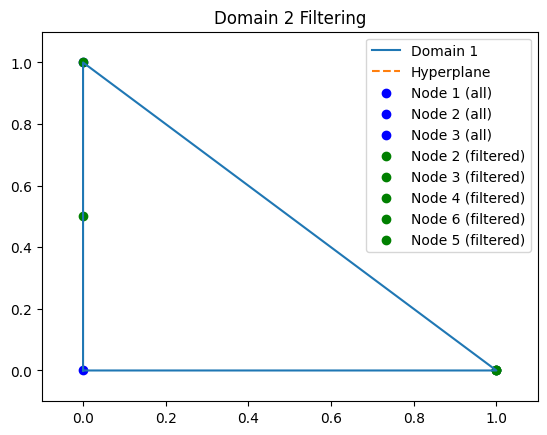

In [ ]:
import matplotlib.pyplot as plt

def plot_domains(nodes, filtered_nodes, w, b, domain_title=""):
    fig, ax = plt.subplots()
    # Plot the original triangle
    triangle = np.array([[0, 0], [1, 0], [0, 1], [0, 0]])
    ax.plot(triangle[:, 0], triangle[:, 1], label="Domain 1")

    # Plot the hyperplane
    x_vals = np.linspace(-0.1, 1.1, 100)
    y_vals = (b - w[0] * x_vals) / w[1]
    ax.plot(x_vals, y_vals, label="Hyperplane", linestyle="--")

    # Plot nodes
    for node in nodes:
        ax.scatter(*node["coordinates"], color="blue", label=f"Node {node['node']} (all)")
    for node in filtered_nodes:
        ax.scatter(*node["coordinates"], color="green", label=f"Node {node['node']} (filtered)")

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.1])
    ax.legend()
    ax.set_title(domain_title)
    plt.show()
w_i, b_i = np.array([1, 2]), -1   # Hyperplane y - 0.5x = - 1
boundary_1,b1 = np.array([1,0]), 0 # where x = 1
boundary_2,b2 = np.array([0,1]), 0 # where y = 1
boundary_3,b3 = np.array([1,1]), 1 # where x + y = 1
nodes_1 = step_1(boundary_1, boundary_2, boundary_3, b1, b2, b3) # Call step_1 to get nodes_1
nodes_1_filtered = step_2(boundary_1, boundary_2, boundary_3, b1, b2, b3, w_i, b_i) # Call step_2 to get nodes_1_filtered


plot_domains(nodes_1, nodes_1_filtered, w_i, b_i, "Domain 2 Filtering")


np.maximum(0, w * x - b)
Number of Neurons in Hidden layer = 3
Initialized W2: [[1.]
 [1.]
 [1.]]
Initialized b2: [[0.        ]
 [0.33333333]
 [0.66666667]]
Matrix M:
[[1.         0.5        0.22222222 0.05555556]
 [0.5        0.33333333 0.17283951 0.04938272]
 [0.22222222 0.17283951 0.09876543 0.0308642 ]
 [0.05555556 0.04938272 0.0308642  0.01234568]]
Vector F:
[[ 3.03854733e-17]
 [-2.02642367e-01]
 [-1.51981775e-01]
 [-5.06605918e-02]]
Initialized W3: [[-1.64140318]
 [-1.64140318]
 [ 1.64140318]]
Initialized b3: [[1.09426878]]


<ipython-input-4-ccc2c0683fa4>:155: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  M[i, j] = inner_product(W2_i, b2_i, W2_j, b2_j, domain, i, j) # Pass i, j


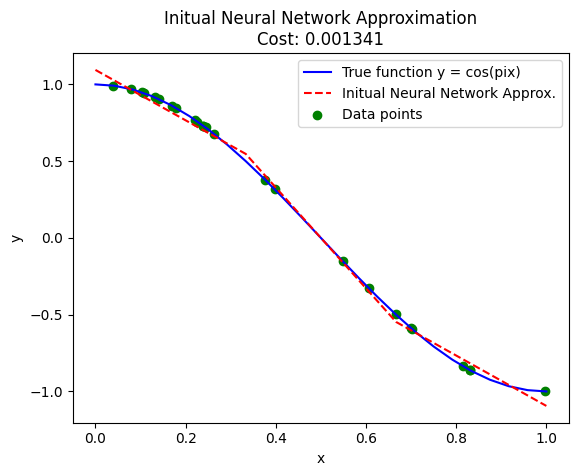

Training Progress: 100%|██████████| 1000000/1000000 [06:30<00:00, 2559.72it/s]


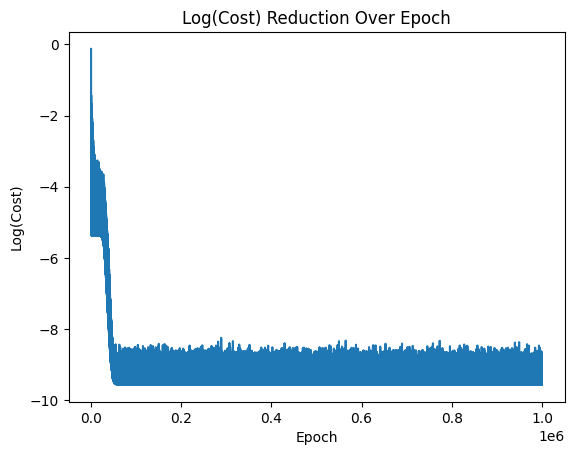

In [ ]:
#________________________________________
#Library
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

#________________________________________
#Sigmoid activation
def activation(z):
    return np.where(z>=0,z,0) #this is for ReLU
    #return 1 / (1 + np.exp(-z)) # This is for Sigmoid

def derivative(z):
    return np.where(z>0,1,0) #this is for ReLU
    #return activation(z) * (1 - activation(z)) # This is for Sigmoid
#________________________________________
# Define the basis function with parameters (weights and bias)
def phi(x, w, b, index): # Added 'index' argument
    if index == 0:  # Handle case for i,j = 0
        return 1  # Return 1 for the constant basis function
    else:
        return np.maximum(0, w * x - b)# in the paper ReLU(wi *x - bi) for the basis function i,j = 1,...,n

print("np.maximum(0, w * x - b)")

# Define the inner product of two basis functions over the domain Omega

#______Need to get the generalised from in this  as we are not allowed to use from scipy.integrate import quad this library ______________________


def inner_product(W2_i, b2_i, W2_j, b2_j, domain, i, j): # Added i, j arguments

    #Diagonal elem.
    if i == 0 and j == 0: #Case 0: i=j = 0
        result = domain[1] - domain[0]
    elif i == j: #Case 1: i=j, for i = 1,2,...,n
        result = ( domain[1] - b2_i )**3 / 3
    #The 0th coloumn/row with the i/j = 1,2,...,n
    elif j == 0 and i!= 0: #Case 2
        result = ( domain[1] - b2_i )**2 / 2
    elif i == 0 and j!= 0:
        result = ( domain[1] - b2_j )**2 / 2
    #The inner Mass matrix
    elif i > j:
        result = 1/3 *(domain[1]**3 - b2_i**3) - 1/2 *(domain[1]**2 - b2_i**2)*(b2_i + b2_j) + b2_i*b2_j*(domain[1] - b2_i)
    elif j > i:
        result = 1/3 *(domain[1]**3 - b2_j**3) - 1/2 *(domain[1]**2 - b2_j**2)*(b2_i + b2_j) + b2_i*b2_j*(domain[1] - b2_j)

    return result

#______Need to get the generalised from in this  as we are not allowed to use from scipy.integrate import quad this library ______________________


#________________________________________
#Numerical Computation for the projected
def composite_trapezium(domain,n,f):
    """
    To approximate the definite integral of the function f(x) over the interval [a,b]
    using the composite trapezium rule with n subintervals.
    Returns
    -------
    integral_approx (float): The approximation of the integral
    """

    x = np.linspace(domain[0],domain[1],n+1) #Construct the quadrature points
    h = (domain[1]-domain[0])/n

    #Construct the quadrature weights:
    #These are the coefficient w_i of f(x_i) in the summation
    weights = h*np.ones(n+1)
    weights[[0,-1]] = h/2

    integral_approx = np.sum(f(x)*weights)

    return integral_approx

def romberg_integration(domain,n,f,level):
    '''
    To approximate the definite integral of the function f(x) over the interval [a,b]
    using the Richardson extrapolation to CTR(n) with the specified level of extrapolation (level).

    Returns
    -------
    integral_approx (float): This gives the approximated integral of the
    function f(x) in the interval [a,b] for Romberg integration approximation based on
    CTR(level*n). Giving R_(level,level).
    '''
    R = np.zeros((level+1,level+1))
    for i in range(0,level+1):
        R[i,0]=composite_trapezium(domain,n,f)
        n = 2*n
        for j in range(1,i+1):
            R[i,j] = (R[i,j-1]*4**(j) -R[i-1,j-1])/(4**(j) -1)

    integral_approx = R[level-1,level-1]
    return integral_approx
#________________________________________
# Define Artificial Neural Network
def neural_network(x, W2, W3, b2, b3):
    z2 = W2 * x + b2 # should be W2.T x + b2 once we are dealing with PDE
    a2 = activation(z2)
    a3 = W3.T @ a2 + b3 # No activation function implemented as this is a regularization problem, not classification.
    return a3
#________________________________________
# Define the Stochastic Descent Method
def cost(W2, W3, b2, b3):
    costvec = np.zeros(Number_of_data_point)
    for j in range(Number_of_data_point):
        x = X[j]
        a3 = neural_network(x, W2, W3, b2, b3)
        costvec[j] = y[j] - a3[0][0]
    costval = np.abs((b - a) / Number_of_data_point) * np.linalg.norm(costvec) ** 2
    return costval
#________________________________________
# Input for the NN
Number_of_data_point = 25  # Increase to 25-50 with respect to the domain.
Number_of_Neurons_in_Hidden_Layer = 3  # The greater the number of neurons, the higher the accuracy, but with a tradeoff in time complexity.
print(f"Number of Neurons in Hidden layer = {Number_of_Neurons_in_Hidden_Layer}" )
# X is the collection of x_i I want to work with, which must be uniformly distributed
a, b = 0, 1  # Domain size
domain = (a, b)
X = np.random.uniform(a, b, Number_of_data_point) # points need to be random but follows the uniform dist.
y = np.cos(np.pi * X)

# Initialize Inner Parameters
W2 = np.ones((Number_of_Neurons_in_Hidden_Layer, 1))
b2 = np.linspace(a,b,Number_of_Neurons_in_Hidden_Layer, endpoint=False).reshape(-1,1) #this should be linspace where the points should be uniformely spaced
# this was resulting in the randomness of the NN output.

print("Initialized W2:", W2)
print("Initialized b2:", b2)
# ________________________________________
# Least-Squares Initialization for Outer Parameters
# Compute phi_matrix (ReLU activations with an extra column for the constant term i,j = 0)
M = np.zeros((Number_of_Neurons_in_Hidden_Layer+1, Number_of_Neurons_in_Hidden_Layer+1))
F = np.zeros((Number_of_Neurons_in_Hidden_Layer+1,1 ))
# Compuational parameters for the Romberg integration
level = 5
n = Number_of_data_point - 1

# Populate the matrix M with the inner products and the projection vector F using the numerical computation
for i in range(Number_of_Neurons_in_Hidden_Layer+1):
    if i == 0 : # Compute F[0] for the constant basis function (index = 0)
        F[i] = romberg_integration(domain, n, lambda x: np.cos(np.pi * x) * phi(x, W2[i], b2[i], i), level)
    else :
        F[i] = romberg_integration(domain, n, lambda x: np.cos(np.pi * x) * phi(x, W2[i-1], b2[i-1], i), level)
    for j in range(Number_of_Neurons_in_Hidden_Layer+1):
        # Use conditional indexing for W2 and b2
        W2_i = W2[i-1] if i > 0 else None
        b2_i = b2[i-1] if i > 0 else None
        W2_j = W2[j-1] if j > 0 else None
        b2_j = b2[j-1] if j > 0 else None

        M[i, j] = inner_product(W2_i, b2_i, W2_j, b2_j, domain, i, j) # Pass i, j

# Display the resulting matrix
print("Matrix M:")
print(M) # this checks out with the hand written calculations
# Display the resulting vector
print("Vector F:")
print(F) # this checks out with the hand written calculations

# Solve for W3 and b3
params = np.linalg.solve(M,F)

b3 = params[0:1]  # Initial bias for output layer
W3 = params[1:]  # Initial weights for output layer

print("Initialized W3:", W3)
print("Initialized b3:", b3)

#________________________________________
#Initial plot of the NN with the Best Least Squares where now the W2 = [1,...,1] and b2 = [0,..., 1] the initial parameters are now set with n number of 1's for W2 and a linspace of b2 with number of elements beign the number of neurons used in hidden layer.
# The outer parameter is just solving for Mc = F where c = [b3, <- W3 -> ] and now plotting the initual plot for NN uisng the best parameters.

x_plot = np.linspace(a, b, Number_of_data_point)
y_plot = np.cos(np.pi *x_plot)
NN_plot = np.array([neural_network(xi, W2, W3, -b2, b3)[0][0] for xi in x_plot])
COST = cost(W2, W3, -b2, b3)

plt.plot(x_plot, y_plot, label="True function y = cos(pix)", color='blue')
plt.plot(x_plot, NN_plot, label="Initual Neural Network Approx.", color='red', linestyle='--')
plt.scatter(X, y, color='green', label="Data points")

plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Initual Neural Network Approximation\nCost: {COST:.6f}")
plt.legend(loc="best")
plt.show()

#________________________________________
# Training Loop
eta = 0.05
Epoch =  (10**6)
costs = np.zeros(Epoch)

for i in tqdm(range(Epoch), desc="Training Progress"):
    k = np.random.randint(0, Number_of_data_point)
    x = X[k]

    # Forward pass
    z2 = W2 * x + b2
    a2 = activation(z2)
    z3 = W3.T @ a2 + b3
    a3 = z3

    # Backpropagation
    delta3 = -2 *(y[k] - a3[0][0])
    delta2 = derivative(z2) * (W3) * delta3

    # Update weights and biases
    b2 = b2 - eta * delta2
    b3 = b3 - eta * delta3 # get ride of this when null phi is ignored

    W2 = W2 - eta * delta2 * x
    W3 = W3 - eta * delta3 * a2

    # Compute and store cost
    newcost = cost(W2, W3, b2, b3)
    costs[i] = (newcost)

#________________________________________
# Plotting the Cost Reduction Over Iterations
ite = [ i for i in range(Epoch)]
plt.plot(ite, np.log(costs))
plt.xlabel("Epoch")
plt.ylabel("Log(Cost)")
plt.title("Log(Cost) Reduction Over Epoch")
plt.show()
